# Understanding Descriptive Statistics

Import the necessary libraries here:

In [37]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [38]:
def dice(times):    
    return([random.choice(range(1, 7)) for i in range(times)])
    
dice_result_df = pd.DataFrame(dice(10))
dice_result_df

,0
0,3
1,6
2,4
3,4
4,4
5,1
6,2
7,1
8,6
9,1


#### 2.- Plot the results sorted by value.

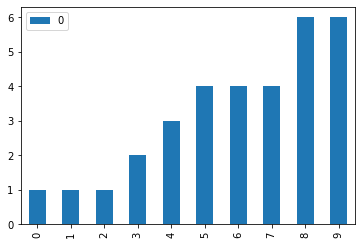

,0
0,1
1,1
2,1
3,2
4,3
5,4
6,4
7,4
8,6
9,6


In [39]:
sorted_df = dice_result_df.sort_values(0).reset_index(drop=True)


sorted_df.plot.bar()
plt.show()
sorted_df

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

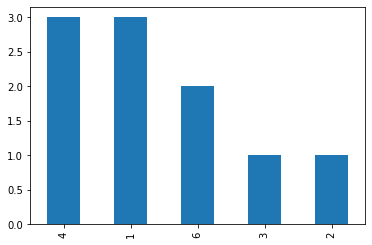

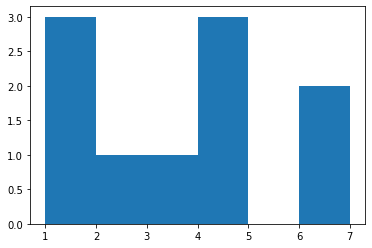

In [48]:
freq = sorted_df[0].value_counts()
freq.plot.bar()
plt.show()


plt.hist(sorted_df[0],bins=[1,2,3,4,5,6,7])
plt.show()

In [42]:
"""
In the first one, the size of the bar doesn't really matter, its just defining what number was the result of each dice roll.
The seccond one shows in the y axes the number of times the dice result was repeated.
"""

"\nIn the first one, the size of the bar doesn't really matter, its just defining what number was the result of each dice roll.\nThe seccond one shows in the y axes the number of times the dice result was repeated.\n"

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [43]:
# your code here
def mean_func(series):
    return series.sum()/len(series)

print('dice results mean: ',mean_func(dice_result_df[0]))

dice results mean:  3.2


#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [44]:
freq_df = pd.DataFrame(freq.values)

print('dice results mean: ',mean_func(freq_df[0]))


dice results mean:  2.0


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [46]:
import math
def median(series):
    sorted_series = series.sort_values()
    if (len(series)%2 == 0):
        first = sorted_series.values[int(len(sorted_series)*.5)]
        second = sorted_series.values[int(len(sorted_series)*.5-1)]
        return (first+second)/2
    else:
        return sorted_series.values[math.floor(len(sorted_series)*.5)]

print('Median for dice results:',median(dice_result_df[0]))
print('Median for frequency df:',median(freq_df[0]))

Median for dice results: 3.5
Median for frequency df: 2


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [73]:
#QUES - Which one is the 4th quartile?

import math

def quartiles(quartile_nb, series):
    sorted_series = series.sort_values()
    percentage = .25
    if (quartile_nb == 3):
        percentage = .75
        
    if (quartile_nb == 1 or quartile_nb == 3):
        if(len(series)/2 % 2 == 0):
            first = sorted_series.values[int(len(sorted_series)*percentage)]
            second = sorted_series.values[int(len(sorted_series)*percentage-1)]
            return (first+second)/2
        else:
            return sorted_series.values[math.floor(len(sorted_series)*percentage)]
        
    if (quartile_nb == 2):
        return median(series)
    
print('Dice results quartile 1:', quartiles(1,dice_result_df[0]))
print('Dice results quartile 2:', quartiles(2,dice_result_df[0]))
print('Dice results quartile 3:', quartiles(3,dice_result_df[0]))
print('Dice frequency quartile 1:', quartiles(1,freq_df[0]))
print('Dice frequency quartile 2:', quartiles(2,freq_df[0]))
print('Dice frequency quartile 3:', quartiles(3,freq_df[0]))

Dice results quartile 1: 1
Dice results quartile 2: 3.5
Dice results quartile 3: 4
Dice frequency quartile 1: 1
Dice frequency quartile 2: 2
Dice frequency quartile 3: 3


## Luke's Solution

In [76]:
def find_quarts(lst):       
    half = len(lst)//2
    split_lst = lst[:half], lst[half:]
    print("1st Quartile: ", [median(i) for i in split_lst][0])
    print("2nd Quartile: ", median(lst))
    print("3rd Quartile: ", [median(i) for i in split_lst][1])
find_quarts(dice_result_df[0].sort_values())

1st Quartile:  1
2nd Quartile:  3.5
3rd Quartile:  4


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [77]:
df_100 = pd.read_csv('../data/roll_the_dice_hundred.csv')
df_100.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


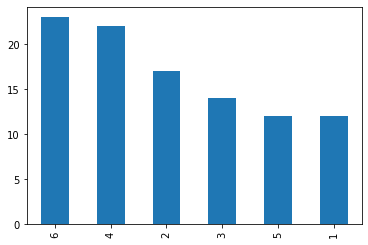

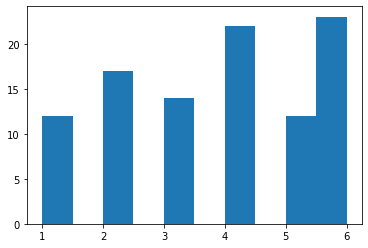

In [99]:
sorted_df = df_100['value'].sort_values()
freq_series = sorted_df.value_counts()

#Sorted values value counts to plot a bar chart
freq_series.plot.bar()
plt.show()

# Sorted values without the aggregation to plot the histogram
plt.hist(sorted_df)
plt.show()

In [100]:
"""
Number 6 and 4 where repetead several times. Not a normal distribution
"""

'\nNumber 6 and 4 where repetead several times. Not a normal distribution\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [101]:
mean_func(df_100['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


In [102]:
# I guess I was asked to do some other thing previously
freq_series

6    23
4    22
2    17
3    14
5    12
1    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

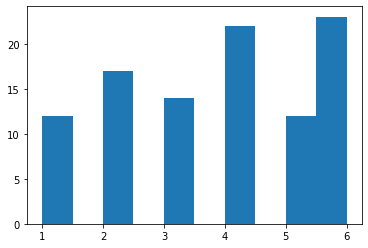

In [103]:
'''
QUES - 
Histograms get me a bit confused. They aggregate by themselves right? So why are we calculating the frequency before?

Why does it go to the right from 1 to 5 and to the left in 6?
''' 
plt.hist(df_100['value'])
plt.show()


In [104]:
"""
It is not a normal ditribution unless we through the dice twice and sum that values. 
"""

'\nIt is not a normal ditribution unless we through the dice twice and sum that values. \n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

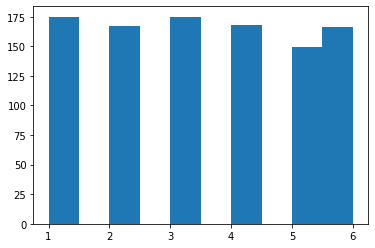

In [105]:
# your code here
df_1000 = pd.read_csv('../data/roll_the_dice_thousand.csv')

plt.hist(df_1000['value'])
plt.show()

In [106]:
"""
Everything is more even. I guess there is the same probability for each number? 
"""

'\nEverything is more even. I guess there is the same probability for each number? \n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [107]:
ages_df = pd.read_csv('../data/ages_population.csv')
ages_df.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


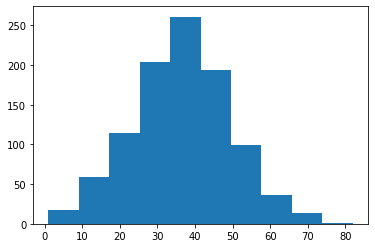

In [108]:
plt.hist(ages_df['observation'])
plt.show()

# my guess: mean around 30something and the deviation10?

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [109]:
print('mean:',ages_df['observation'].mean())
print('std deviation:',ages_df['observation'].std())

mean: 36.56
std deviation: 12.81649962597677


In [92]:
"""
your comments here
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

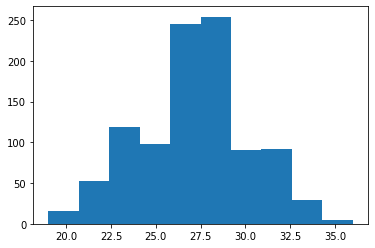

In [93]:
ages_df2 = pd.read_csv('../data/ages_population2.csv')
plt.hist(ages_df2['observation'])
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [94]:
"""
Yes, there are more cases of people between 26 and 29, no people abouve 36/37
"""

'\nYes, there are more cases of people between 26 and 29, no people abouve 36/37\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [95]:
print('mean:',ages_df2['observation'].mean())
print('std deviation:',ages_df2['observation'].std())

mean: 27.155
std deviation: 2.9698139326891835


In [ ]:
"""
Ages are less spread out.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

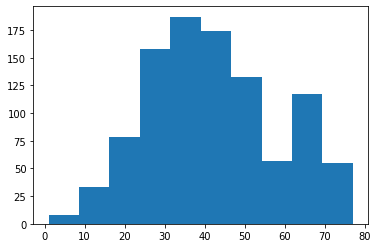

In [129]:
ages_df3 = pd.read_csv('../data/ages_population3.csv')
plt.hist(ages_df3['observation'])
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [371]:
print('mean:',ages_df3['observation'].mean())
print('std deviation:',ages_df3['observation'].std())


mean: 41.989
std deviation: 16.14470595986593


In [ ]:
"""
the mean is a bit moved to the right from the mode and median because of the big amount of results between 60 and 70(?)
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [130]:
print(ages_df3['observation'].describe())

print('difference between mean and median',ages_df3['observation'].median()-ages_df3['observation'].mean())

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64
difference between mean and median -1.9889999999999972


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [131]:
ages_df3['observation'].describe()

count    1000.000000
mean       41.989000
std        16.144706
min         1.000000
25%        30.000000
50%        40.000000
75%        53.000000
max        77.000000
Name: observation, dtype: float64

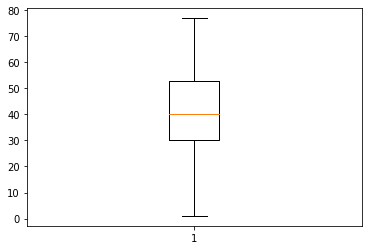

In [135]:
plt.boxplot(ages_df3['observation'])
plt.show()

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""